# Exercise 7 - Fourier Transforms and Wavelet Transforms


### Introduction


In this exercise we will study two very versatile and useful transforms and see some examples of their uses in remote sensing using Python.

### How to use this jupyter notebook

The jupyter notebook is composed by a series of *cells*, each one containing either Python code or text instruction.
The text instruction that you are currently reading here are inside a text cell.

To run a cell, just click on it and then press the *Run* button at the top of the screen, or use the shortcut *Shift - Enter*.
You will not need to run *text cells*.
Only cells containing Python code need to be run, making sure that you are following a descending order: from the beginning of this jupyter notebook to its end. 
Since this Jupyter notebook runs online, you will not need to install anything on your personal computer.

You are not required to have pregressed Python knowledge.
All you will have to do is to modify the value of some quantities (or *variables*) to achieve the result requested by each section of the exercise.
You will need to interpret these results to answer the questions of the exercise.
However, if you want to experiment with the code provided, feel free to edit the code: the change that you make will not overwrite the original copy of the notebook.
Refreshing the exercise link will bring you back to a pristine copy of the exercise code, so, don't worry too much about the risk of "breaking" the code.

Variables that will need to be modified will be preceeded by a comment, which clearly marks them as "to modify".
A comment is a line of code preceeded by the symbol *#*.
For example:

    # This is a comment

A variable that you will be required to modify will look like the following example:
    
    # Modify the value of the following variable
    VARAIBLE_TO_MODIFY = 2

Naturally, in each case the name of the variable will be different.
To highlight those variables, they will always be written in UPPERCASE.

To modify the variable, change the value after the = sign. For example:

    VARAIBLE_TO_MODIFY = 3

will change the value of *VARAIBLE_TO_MODIFY* from *2* to *3*.

#### Start the exercise by running the next cell: it will import the libraries needed for the exercise.

In [2]:
import numpy as np               # Array manipulation
import scipy                     # Scientific computing
import PIL.Image                 # Manipulation of images
import matplotlib.pyplot as plt  # Plotting

## 1. 2D Fourier transform

The Fourier transform decomposes a signal into its main constituting frequencies and besides the rich additional information it gives about the signal, it is also a very convenient tool for signal filtering and processing.
This section shows some properties of the 2D Fourier transform as well as some examples of usage for remote sensing data, in particular satellite images.

### 1.1 Study of the 2D Fourier transform

In this exercice we will study the Fourier transform of an aerial image of Grammichele, in Sicily.
We will then observe the effects of rotation and translation on the frequency spectrum.

Let's start by loading the image. Run the following cells: there is no need to modify anything for the moment, the code will already load and display the image for you.

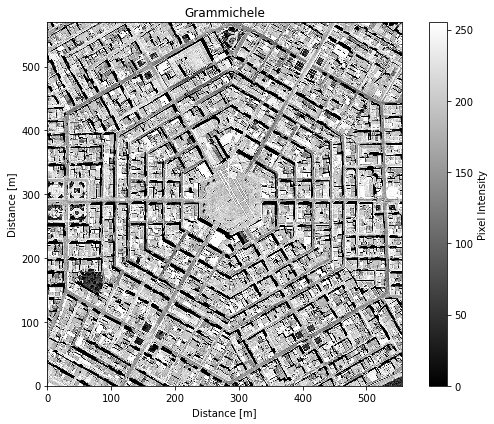

In [19]:
# Loading the image
grammichele = np.array(PIL.Image.open("1_Fourier/grammichele.tif"))

#  Resolution of a pixel
pix_res = 0.4 # m

# Computing x and y coordinates in meters
dim_x = grammichele.shape[1]
dim_y = grammichele.shape[0]
new_x = np.arange(0, dim_x) * pix_res
new_y = np.arange(0, dim_y) * pix_res

# Displaying the image
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.set_aspect('equal')
mappable = ax.pcolormesh(new_x, new_y, grammichele, cmap='gray', shading='auto')
plt.sca(ax)
plt.colorbar(mappable=mappable, label='Pixel Intensity')
ax.set_xlabel('Distance [m]')
ax.set_ylabel('Distance [m]')
ax.set_title('Grammichele')
plt.tight_layout()
plt.show()

Run the next cell to perform the Fourier transform of the image just loaded and visualize it.

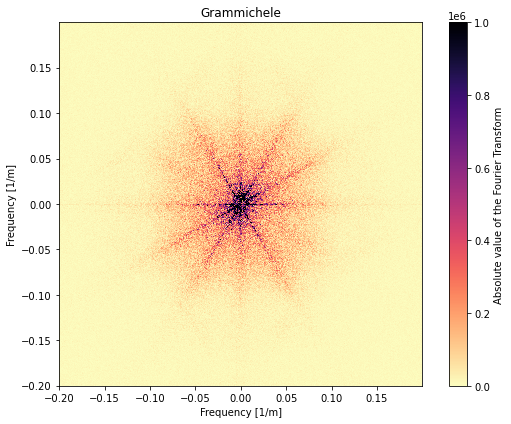

In [60]:
# Performing the Fourier transform
grammichele_fft = scipy.fft.fft2(grammichele)

#  Resolution of a pixel
pix_res = 0.4 # m

# Shifting the zero-frequency component to the center of the spectrum
grammichele_fft_centered = scipy.fft.fftshift(grammichele_fft)
dim_x = grammichele_fft_centered.shape[1]
dim_y = grammichele_fft_centered.shape[0]
new_x = np.arange(-np.floor(dim_x/2.), np.floor(dim_x/2.)) * pix_res / dim_x
new_y = np.arange(-np.floor(dim_y/2.), np.floor(dim_y/2.)) * pix_res / dim_y

# The absolute value of the array
grammichele_fft_centered_real = np.absolute(grammichele_fft_centered)

# Displaying the transform
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.set_aspect('equal')
colorbar_limit = 1.e6 # This parameters limits the extent of the colorbar
mappable = ax.pcolormesh(new_x, new_y, grammichele_fft_centered_real, cmap='magma_r',
                         vmin=0, vmax=colorbar_limit, shading='auto')
plt.sca(ax)
plt.colorbar(mappable=mappable, label='Absolute value of the Fourier Transform')
ax.set_xlabel('Frequency [1/m]')
ax.set_ylabel('Frequency [1/m]')
ax.set_title('Grammichele')
plt.tight_layout()
plt.show()

Looking at both the original aerial image and its Fourier transform, you will be able to answer the first question of the exercise.


> **Question 1**: What are the axis with the dominant frequencies? To which features do they correspond in the image?


In the following cell we will load a copy of the original image, resized and translated.
Run it to perform its Fourier transform and visualize the results side by side with the input image.

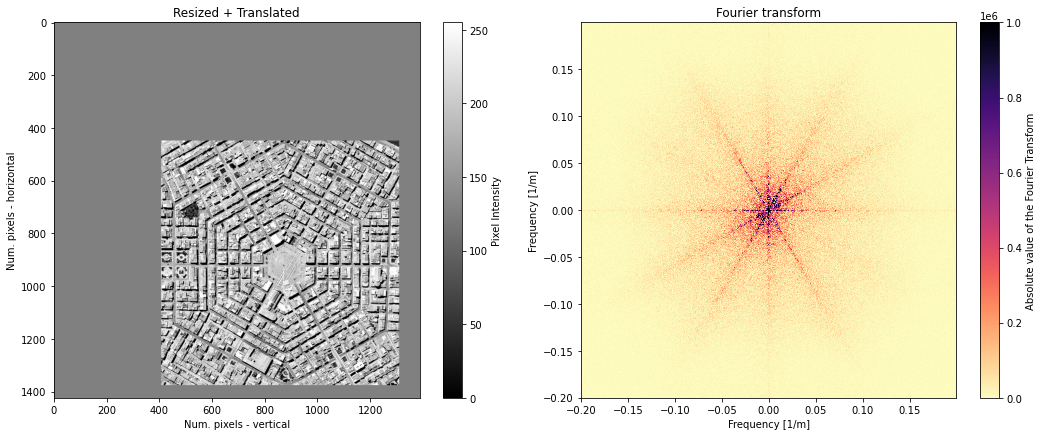

In [61]:
# Loading the image
grammichele_translated = np.array(PIL.Image.open("1_Fourier/grammichele_scaled_translated.tif"))

#  Resolution of a pixel
pix_res = 0.4 # m

# Performing the Fourier transform
grammichele_translated_fft = scipy.fft.fft2(grammichele_translated)

# Shifting the zero-frequency component to the center of the spectrum
grammichele_translated_fft_centered = scipy.fft.fftshift(grammichele_translated_fft)
dim_x = grammichele_translated_fft_centered.shape[1]
dim_y = grammichele_translated_fft_centered.shape[0]
new_x = np.arange(-np.floor(dim_x/2.), np.floor(dim_x/2.)) * pix_res / dim_x
new_y = np.arange(-np.floor(dim_y/2.), np.floor(dim_y/2.)) * pix_res / dim_y

# The absolute value of the array
grammichele_translated_fft_centered_real = np.absolute(grammichele_translated_fft_centered)

# Plotting the results and the aerial image
fig, axes = plt.subplots(1,2,figsize=(15,6))

ax0 = axes[0]
mappable0 = ax0.imshow(grammichele_translated, cmap='gray')
plt.sca(ax0)
plt.colorbar(mappable=mappable0, label='Pixel Intensity')
ax0.set_xlabel('Num. pixels - vertical')
ax0.set_ylabel('Num. pixels - horizontal')
ax0.set_title('Resized + Translated')

ax1 = axes[1]
ax1.set_aspect('equal')
colorbar_limit = 1.e6 # This parameters limits the extent of the colorbar
mappable = ax1.pcolormesh(new_x, new_y, grammichele_translated_fft_centered_real, cmap='magma_r',
                         vmin=0., vmax=colorbar_limit, shading='auto')
plt.sca(ax1)
plt.colorbar(mappable=mappable, label='Absolute value of the Fourier Transform')
ax1.set_xlabel('Frequency [1/m]')
ax1.set_ylabel('Frequency [1/m]')
ax1.set_title('Fourier transform')

plt.tight_layout()
plt.show()

We repeat the operation once again for an image that has also been rotated of 20° (other than being resized and translated).
Run the following cell to perform its Fourier transform and visualize the results side by side with the input image.

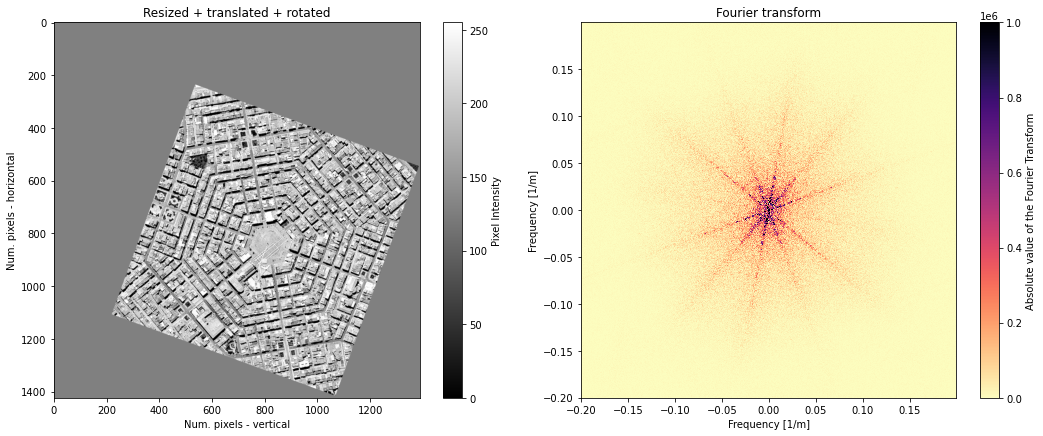

In [62]:
# Loading the image
grammichele_rotated = np.array(PIL.Image.open("1_Fourier/grammichele_rotated_20.tif"))

#  Resolution of a pixel
pix_res = 0.4 # m

# Performing the Fourier transform
grammichele_rotated_fft = scipy.fft.fft2(grammichele_rotated)

# Shifting the zero-frequency component to the center of the spectrum
grammichele_rotated_fft_centered = scipy.fft.fftshift(grammichele_rotated_fft)
dim_x = grammichele_rotated_fft_centered.shape[1]
dim_y = grammichele_rotated_fft_centered.shape[0]
new_x = np.arange(-np.floor(dim_x/2.), np.floor(dim_x/2.)) * pix_res / dim_x
new_y = np.arange(-np.floor(dim_y/2.), np.floor(dim_y/2.)) * pix_res / dim_y

# The absolute value of the array
grammichele_rotated_fft_centered_real = np.absolute(grammichele_rotated_fft_centered)

# Plotting the results and the aerial image
fig, axes = plt.subplots(1,2,figsize=(15,6))

ax0 = axes[0]
mappable0 = ax0.imshow(grammichele_rotated, cmap='gray')
plt.sca(ax0)
plt.colorbar(mappable=mappable0, label='Pixel Intensity')
ax0.set_xlabel('Num. pixels - vertical')
ax0.set_ylabel('Num. pixels - horizontal')
ax0.set_title('Resized + translated + rotated')

ax1 = axes[1]
ax1.set_aspect('equal')
colorbar_limit = 1.e6 # This parameters limits the extent of the colorbar
mappable = ax1.pcolormesh(new_x, new_y, grammichele_rotated_fft_centered_real, cmap='magma_r',
                         vmin=0, vmax=colorbar_limit, shading='auto')
plt.sca(ax1)
plt.colorbar(mappable=mappable, label='Absolute value of the Fourier Transform')
ax1.set_xlabel('Frequency [1/m]')
ax1.set_ylabel('Frequency [1/m]')
ax1.set_title('Fourier transform')

plt.tight_layout()
plt.show()

Looking at the Fourier transfor of:
- the original image
- the resized and translated image
- the rotated (and resized+translated) image

Compare the result and answer the following question.


> **Question 2**: Do the rotation affect the Fourier transform differently from the sole translation+resizing? Explain how each of them differ from the Fourier transform of the original aerial image.

### 1.2 Filtering in the frequency domain

In this exercise we will see how to perform a simple filtering operation on the Fourier transform.

We will perform the filtering on the Fourier transform results of the *grammichele.tif* image, obtained in Subsection 1.1.

First of all, we will define a simple function to perform the filtering.
This function takes the following arguments:
- **im_fft**, the Fourier transform of the image that we want to filter;
- **filter_type**, the type of filter, which can be either “lowpass” or “highpass”;
- **cut_freq**, the cutting frequency, which is specified in [1/m];
- **pix_res**, the pixel resolution in [m] (default 0.4 m).

Since the resolution of the image is approximately 0.4 meters, a frequency of 1/2 [1/m] corresponds to a frequency of 1 every 5 pixels for example.

In [63]:
def fft_filter(im_fft, filter_type, cut_freq, pix_res=0.4):
    '''
    Simple filtering on the Fourier transform.
    
    
    Parameters
    ----------
    im_fft : complex numpy array (2D)
        The Fourier transform of the image to filter.
    filter_type : string
        Type of filter, “lowpass” or “highpass”
    cut_freq : float
        Cutting frequency in [1/m]
    pix_res : float
        Pixel resolution in [m]
        
    Returns
    -------
    im_filt : numpy array (2D)
        The filtered image.
    filt_fft : complex numpy array (2D)
        The masked Fourier transform used to perform the filtering
    '''
    dim_x = im_fft.shape[1]
    dim_y = im_fft.shape[0]

    # Let' work with the 0 frequency at the center of the image
    new_x = np.arange(-np.floor(dim_x/2.), np.floor(dim_x/2.)) * pix_res / dim_x
    new_y = np.arange(-np.floor(dim_y/2.), np.floor(dim_y/2.)) * pix_res / dim_y
    
    x2d, y2d = np.meshgrid(new_x, new_y)
    freq = np.sqrt(np.square(x2d) + np.square(y2d))
    
    if filter_type == 'lowpass':
        freq_mask = freq < cut_freq
    elif filter_type == 'highpass':
        freq_mask = freq > cut_freq
    else:
        # In case of invalid input
        print('ERROR: Invalid parameter for filter type.')
        empty_return = np.full(im_fft.shape, np.nan)
        return empty_return, im_fft
    
    # The frequency masked
    filt_fft = np.multiply(im_fft, freq_mask)
    
    # Inverse Fourier transform
    im_filt_complex = np.fft.ifft2(np.fft.ifftshift(filt_fft))
    im_filt = np.absolute(im_filt_complex)
    
    return im_filt, filt_fft

We will first have a look at the effect of a low-pass filter on the original Grammichele aerial image.
To do so, we have to apply the function defined in the previous cell to the Fourier transform of the image, *grammichele_fft*, which we computed at the beginning of Subsection 1.1.

It will be interesting to observe what effect changing the cutting frequency will have on the filtered image.

**Here you will have to modify for the first time the value of a variable**

Run the following cell a first time as it is, to visualize the results, and then change the value of the variable:\
*CUTTING_FREQUENCY*

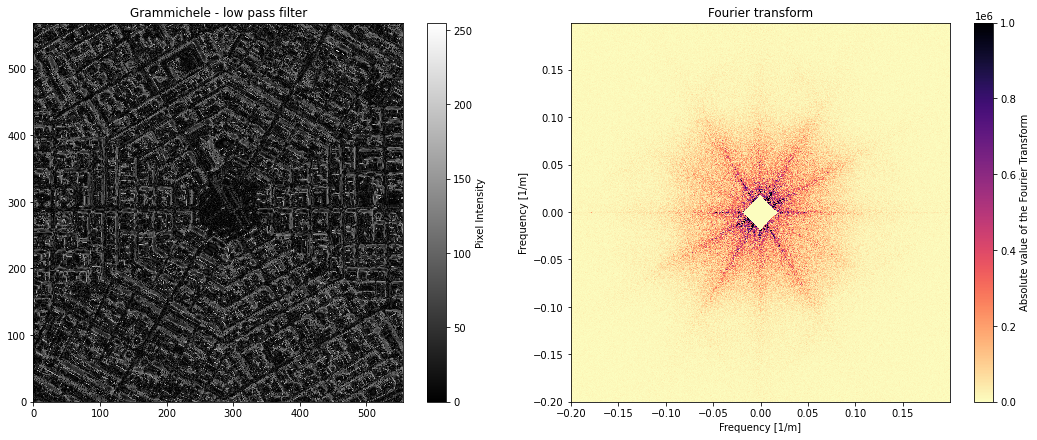

In [75]:
# Change the following variable, containing the cutting frequency in [1/m]
CUTTING_FREQUENCY = 0.27

#  Resolution of a pixel
pix_res = 0.4 # m

# Filtering the image
grammichele_lowpass, grammichele_lowpass_filt = fft_filter(grammichele_fft, 'lowpass', CUTTING_FREQUENCY, 0.4)

# Shifting the zero-frequency component of the masked FFT to the center of the spectrum
grammichele_lowpass_filt_centered = scipy.fft.fftshift(grammichele_lowpass_filt)
dim_x = grammichele_lowpass_filt_centered.shape[1]
dim_y = grammichele_lowpass_filt_centered.shape[0]
new_x = np.arange(-np.floor(dim_x/2.), np.floor(dim_x/2.)) * pix_res / dim_x
new_y = np.arange(-np.floor(dim_y/2.), np.floor(dim_y/2.)) * pix_res / dim_y

# The absolute value of the array
grammichele_lowpass_filt_centered_real = np.absolute(grammichele_lowpass_filt_centered)

# The x and y axis for the plot of the filtered image
filt_x = np.arange(0, dim_x) * pix_res
filt_y = np.arange(0, dim_y) * pix_res

# Displaying the results
fig, axes = plt.subplots(1,2,figsize=(15,6))

ax0 = axes[0]
ax0.set_aspect('equal')
mappable = ax0.pcolormesh(filt_x, filt_y, np.real(grammichele_lowpass), cmap='gray', shading='auto')
plt.sca(ax0)
plt.colorbar(mappable=mappable0, label='Pixel Intensity')
ax.set_xlabel('Distance [m]')
ax.set_ylabel('Distance [m]')
ax0.set_title('Grammichele - low pass filter')

ax1 = axes[1]
ax1.set_aspect('equal')
colorbar_limit = 1.e6 # This parameters limits the extent of the colorbar
mappable = ax1.pcolormesh(new_x, new_y, grammichele_lowpass_filt_centered_real, cmap='magma_r',
                         vmin=0., vmax=colorbar_limit, shading='auto')
plt.sca(ax1)
plt.colorbar(mappable=mappable, label='Absolute value of the Fourier Transform')
ax1.set_xlabel('Frequency [1/m]')
ax1.set_ylabel('Frequency [1/m]')
ax1.set_title('Fourier transform')

plt.tight_layout()
plt.show()

By modifying the value of CUTTING_FREQUENCY in the previous cell, you can observe the effects of more and less restrictive low-pass filters on the image.
You are now ready to answer the next question of the exercise:

> **Question 3**: What is the effect of a low-pass filter on the image? What effect do the modification of CUTTING_FREQUENCY have on the final result


We can now apply the high-pass filter to the image.
The procedure follows closely the one used for the low-pass filter.

Like before, run the following cell a first time as it is, to visualize the results, and then change the value of the variable:\
*CUTTING_FREQUENCY*

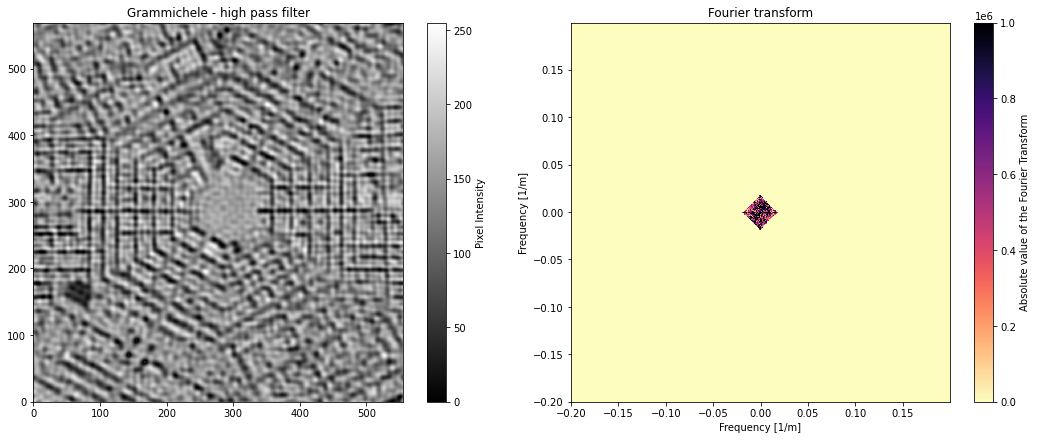

In [78]:
# Change the following variable, containing the cutting frequency in [1/m]
CUTTING_FREQUENCY = 0.27

#  Resolution of a pixel
pix_res = 0.4 # m

# Filtering the image
grammichele_highpass, grammichele_highpass_filt = fft_filter(grammichele_fft, 'highpass', CUTTING_FREQUENCY, 0.4)

# Shifting the zero-frequency component of the masked FFT to the center of the spectrum
grammichele_highpass_filt_centered = scipy.fft.fftshift(grammichele_highpass_filt)
dim_x = grammichele_highpass_filt_centered.shape[1]
dim_y = grammichele_highpass_filt_centered.shape[0]
new_x = np.arange(-np.floor(dim_x/2.), np.floor(dim_x/2.)) * pix_res / dim_x
new_y = np.arange(-np.floor(dim_y/2.), np.floor(dim_y/2.)) * pix_res / dim_y

# The absolute value of the array
grammichele_highpass_filt_centered_real = np.absolute(grammichele_highpass_filt_centered)

# The x and y axis for the plot of the filtered image
filt_x = np.arange(0, dim_x) * pix_res
filt_y = np.arange(0, dim_y) * pix_res

# Displaying the results
fig, axes = plt.subplots(1,2,figsize=(15,6))

ax0 = axes[0]
ax0.set_aspect('equal')
mappable = ax0.pcolormesh(filt_x, filt_y, np.real(grammichele_highpass), cmap='gray', shading='auto')
plt.sca(ax0)
plt.colorbar(mappable=mappable0, label='Pixel Intensity')
ax.set_xlabel('Distance [m]')
ax.set_ylabel('Distance [m]')
ax0.set_title('Grammichele - high pass filter')

ax1 = axes[1]
ax1.set_aspect('equal')
colorbar_limit = 1.e6 # This parameters limits the extent of the colorbar
mappable = ax1.pcolormesh(new_x, new_y, grammichele_highpass_filt_centered_real, cmap='magma_r',
                         vmin=0., vmax=colorbar_limit, shading='auto')
plt.sca(ax1)
plt.colorbar(mappable=mappable, label='Absolute value of the Fourier Transform')
ax1.set_xlabel('Frequency [1/m]')
ax1.set_ylabel('Frequency [1/m]')
ax1.set_title('Fourier transform')

plt.tight_layout()
plt.show()